#Importing necessary requirements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#1.Load Dataset

In [3]:
df=pd.read_csv("Clean_Dataset.csv")

In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


No Null Values. So it's a cleaned dataset

In [6]:
df.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [7]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#2.Data Preprocessing

In [8]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [9]:
Features=np.array(df.columns)

In [10]:
Features

array(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'], dtype=object)

In [11]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

##Handling Data

In [12]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [13]:
def convert_stops_to_num(x):
  if x=="zero":
    return 0
  elif x=="one":
    return 1
  else:
    return 2

In [14]:
df['stops']=df['stops'].apply(lambda x: convert_stops_to_num(x))

In [15]:
df['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

we can observe that there is min value of 0.83 hrs means that it is not in hour min format .so we have to convert all these into minutes.

In [16]:
def convert_to_minutes(x):
  return int(x*60)

In [17]:
df['duration']=df['duration'].apply(lambda x: convert_to_minutes(x))

In [18]:
df.dtypes

airline             object
flight              object
source_city         object
departure_time      object
stops                int64
arrival_time        object
destination_city    object
class               object
duration             int64
days_left            int64
price                int64
dtype: object

In [19]:
df["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [20]:
df1=df.copy()

##Normalization of numerical cols

In [21]:
numerical_cols=["stops","duration","days_left"]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [23]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [24]:
df.head()

airline   flight source_city departure_time  stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening    0.0          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning    0.0        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning    0.0  Early_Morning   
3   Vistara   UK-995       Delhi        Morning    0.0      Afternoon   
4   Vistara   UK-963       Delhi        Morning    0.0        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy  0.027551        0.0   5953  
1           Mumbai  Economy  0.030612        0.0   5953  
2           Mumbai  Economy  0.027551        0.0   5956  
3           Mumbai  Economy  0.029252        0.0   5955  
4           Mumbai  Economy  0.030612        0.0   5955

numerical columns are scaled using MinMaxScaler that puts data b/w 0 and 1

In [25]:
df.shape

(300153, 11)

In [26]:
average_price_by_flight = df.groupby('flight')['price'].mean().sort_values()
display(average_price_by_flight)

flight
6E-7141     1105.000000
6E-7259     1105.000000
6E-7252     1105.000000
6E-557      1105.000000
6E-987      1443.000000
               ...     
UK-970     39421.341424
UK-985     39568.600798
UK-930     39953.565074
UK-820     40522.342664
AI-433     44025.000000
Name: price, Length: 1561, dtype: float64

we can see that flight belonging to indigo 6e various flights has same price and has no impact so drop this column

In [27]:
df.drop("flight",inplace=True,axis=1)

##Encode object variable

In [28]:
features_to_encode = [col for col in df.columns if df[col].dtype == 'object']

In [29]:
features_to_encode

['airline',
 'source_city',
 'departure_time',
 'arrival_time',
 'destination_city',
 'class']

In [30]:
for i in features_to_encode:
  print(i,len(df[i].unique()))

airline 6
source_city 6
departure_time 6
arrival_time 6
destination_city 6
class 2


In [31]:
df = pd.get_dummies(df, columns=features_to_encode, drop_first=True).astype(int)

In [32]:
encoded_columns=df.columns.tolist()

In [33]:
encoded_columns

['stops',
 'duration',
 'days_left',
 'price',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_SpiceJet',
 'airline_Vistara',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'departure_time_Early_Morning',
 'departure_time_Evening',
 'departure_time_Late_Night',
 'departure_time_Morning',
 'departure_time_Night',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'destination_city_Mumbai',
 'class_Economy']

In [34]:
joblib.dump(encoded_columns,"encoded_columns.pkl")

['encoded_columns.pkl']

In [35]:
df.head()

stops  duration  days_left  price  airline_Air_India  airline_GO_FIRST  \
0      0         0          0   5953                  0                 0   
1      0         0          0   5953                  0                 0   
2      0         0          0   5956                  0                 0   
3      0         0          0   5955                  0                 0   
4      0         0          0   5955                  0                 0   

   airline_Indigo  airline_SpiceJet  airline_Vistara  source_city_Chennai  \
0               0                 1                0                    0   
1               0                 1                0                    0   
2               0                 0                0                    0   
3               0                 0                1                    0   
4               0                 0                1                    0   

   ...  arrival_time_Evening  arrival_time_Late_Night  arrival_time_Morning  \
0  ...                     0                        0                     0   
1  ...                     0                        0                     1   
2  ...                     0                        0                     0   
3  ...                     0                        0                     0   
4  ...                     0                        0                     1   

   arrival_time_Night  destination_city_Chennai  destination_city_Delhi  \
0                   1                         0                       0   
1                   0                         0                       0   
2                   0                         0                       0   
3                   0                         0                       0   
4                   0                         0                       0   

   destination_city_Hyderabad  destination_city_Kolkata  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   destination_city_Mumbai  class_Economy  
0                        1              1  
1                        1              1  
2                        1              1  
3                        1              1  
4                        1              1  

[5 rows x 30 columns]

In [36]:
df.shape

(300153, 30)

#3.Exploratory Data Analysis

In [37]:
df1.head()

airline   flight source_city departure_time  stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening      0          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning      0        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning      0  Early_Morning   
3   Vistara   UK-995       Delhi        Morning      0      Afternoon   
4   Vistara   UK-963       Delhi        Morning      0        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy       130          1   5953  
1           Mumbai  Economy       139          1   5953  
2           Mumbai  Economy       130          1   5956  
3           Mumbai  Economy       135          1   5955  
4           Mumbai  Economy       139          1   5955

In [38]:
plt.figure(figsize=(50,25),dpi=250)
vary = df1.groupby("airline")["price"].sum().sort_values(ascending=True).plot(kind="barh", cmap="viridis")
plt.xlabel("Price")
plt.ylabel("Airline")
plt.title("Total Price by Airline", fontsize=9, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'SpiceJet'),
  Text(0, 1, 'AirAsia'),
  Text(0, 2, 'GO_FIRST'),
  Text(0, 3, 'Indigo'),
  Text(0, 4, 'Air_India'),
  Text(0, 5, 'Vistara')])

In [39]:
plt.figure(figsize=(50,25),dpi=250)
affected = df1.groupby("days_left")["price"].mean().plot(kind="line", color="black", linewidth=3.5, linestyle="-")
plt.title("Average Ticket Price")
plt.ylabel("Average Price")
plt.xlabel("Days Before Departure")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [40]:
df1.head()

airline   flight source_city departure_time  stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening      0          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning      0        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning      0  Early_Morning   
3   Vistara   UK-995       Delhi        Morning      0      Afternoon   
4   Vistara   UK-963       Delhi        Morning      0        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy       130          1   5953  
1           Mumbai  Economy       139          1   5953  
2           Mumbai  Economy       130          1   5956  
3           Mumbai  Economy       135          1   5955  
4           Mumbai  Economy       139          1   5955

check how price is effected by arrival and departure Time

In [41]:
plt.figure(figsize=(50,25),dpi=250)
plt.subplot(1,2,1)
arrival=df1.groupby("arrival_time")["price"].mean().sort_values(ascending=True).plot(kind="barh",color="red")
plt.xlabel("Price")
plt.ylabel("Arrival Time")
plt.title("Total Price by Arrival Time", fontsize=9, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


plt.subplot(1,2,2)
departure=df1.groupby("departure_time")["price"].mean().sort_values(ascending=True).plot(kind="barh", cmap="viridis")
plt.xlabel("Price")
plt.ylabel("Departure Time")
plt.title("Total Price by Departure Time", fontsize=9, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Late_Night'),
  Text(0, 1, 'Afternoon'),
  Text(0, 2, 'Early_Morning'),
  Text(0, 3, 'Evening'),
  Text(0, 4, 'Morning'),
  Text(0, 5, 'Night')])

how price is effected wrt source and destination city

In [42]:
plt.figure(figsize=(50,25),dpi=250)
plt.subplot(1,2,1)
source=df1.groupby('source_city')['price'].mean().sort_values(ascending=True).plot(kind="barh",color="red")
plt.xlabel("Price")
plt.ylabel("Source City")
plt.title("Total Price by Source City", fontsize=9, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.subplot(1,2,2)
destination=df1.groupby('destination_city')['price'].mean().sort_values(ascending=True).plot(kind="barh", cmap="viridis")
plt.xlabel("Price")
plt.ylabel("Destination City")
plt.title("Total Price by Destination City", fontsize=9, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Delhi'),
  Text(0, 1, 'Hyderabad'),
  Text(0, 2, 'Mumbai'),
  Text(0, 3, 'Bangalore'),
  Text(0, 4, 'Chennai'),
  Text(0, 5, 'Kolkata')])

how price is vary wrt class

In [43]:
plt.figure(figsize=(50,25),dpi=250)
vary=df1.groupby("class")["price"].sum().sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Price")
plt.ylabel("Class")
plt.title("Total Price by Class", fontsize=9, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


(array([0, 1]), [Text(0, 0, 'Economy'), Text(0, 1, 'Business')])

In [44]:
cat = df1.select_dtypes(include="object")
num = df1.select_dtypes(include="number")
cat = cat.drop(columns=["airline","flight"])

In [45]:
Encoded = pd.get_dummies(cat, drop_first=True)

In [46]:
concat = pd.concat([Encoded,num], axis=1)

In [47]:
plt.figure(figsize=(50,25),dpi=250)
sns.heatmap(concat.corr(), annot=True)
plt.show()

#4.Model Training and Model Building

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("price",axis=1),df["price"],test_size=0.25,random_state=42)

In [50]:
X_train.shape,X_test.shape

((225114, 29), (75039, 29))

##Baseline Model Development-Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [52]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [53]:
lr_ypred=lr_model.predict(X_test)

In [54]:
lr_model.score(X_train,y_train)

0.8929853434403274

In [55]:
lr_model.score(X_test,y_test)

0.8938384743226397

##Baseline Model Development - Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()

In [57]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
dt_ypred=dt_model.predict(X_test)

In [59]:
dt_model.score(X_train,y_train)

0.9505183490807887

In [60]:
dt_model.score(X_test,y_test)

0.9482650908986285

##Baseline Model Comparision

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,classification_report

In [62]:
r2_lr=r2_score(y_test,lr_ypred)
mae_lr=mean_absolute_error(y_test,lr_ypred)
mse_lr=mean_squared_error(y_test,lr_ypred)

In [63]:
r2_dt=r2_score(y_test,dt_ypred)
mae_dt=mean_absolute_error(y_test,dt_ypred)
mse_dt=mean_squared_error(y_test,dt_ypred)

In [64]:
print(f"r2_score:{r2_lr},MAE:{mae_lr},MSE:{mse_lr}")
print(f"r2_score:{r2_dt},MAE:{mae_dt},MSE:{mse_dt}")

r2_score:0.8938384743226397,MAE:4697.080128486029,MSE:54738795.093324065
r2_score:0.9482650908986285,MAE:3196.2254929567266,MSE:26675451.114731334


#5.Model Improvement

##Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

In [66]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
rf_model.score(X_train,y_train)

0.9504855126199087

In [68]:
rf_model.score(X_test,y_test)

0.9482686865856091

In [69]:
r2_rf=r2_score(y_test,rf_model.predict(X_test))
mae_rf=mean_absolute_error(y_test,rf_model.predict(X_test))
mse_rf=mean_squared_error(y_test,rf_model.predict(X_test))

In [70]:
print(f"r2_score:{r2_rf},MAE:{mae_rf},MSE:{mse_rf}")


r2_score:0.9482686865856091,MAE:3196.760705846972,MSE:26673597.113749385


we can observe that it is similar to Decision tree .we can use Decision tree model for our project

##HyperParameter Tuning

To try improving the accuracy score of dt_model we perform GridSearchCV or RandomizedSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params_distribution={
    'splitter':['best','random'],
    "criterion":["squared_error"]
}

In [73]:
random_search_dt=RandomizedSearchCV(dt_model,params_distribution,cv=5,n_iter=10,random_state=42,verbose=1)

In [74]:
random_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error'],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [75]:
random_search_dt.best_params_,random_search_dt.best_score_

({'splitter': 'random', 'criterion': 'squared_error'},
 np.float64(0.9485709760185322))

In [76]:
random_search_dt.score(X_test,y_test)

0.9482720183794824

#6.Visualization

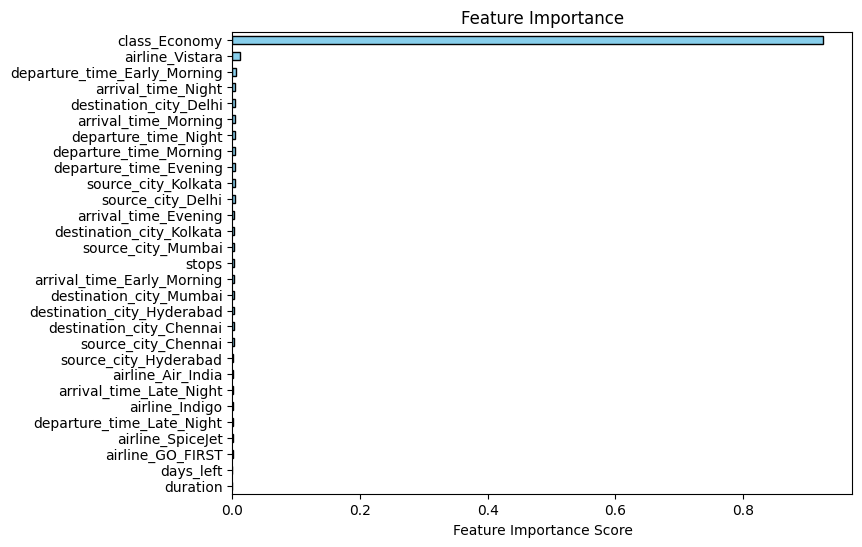

In [77]:
importances = dt_model.feature_importances_
features = X_train.columns

# Put into DataFrame
feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,6))
feat_importances.plot(kind='barh', color="skyblue", edgecolor="k")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance")
plt.show()



In [78]:
feat_importances

duration                        0.000000
days_left                       0.000000
airline_GO_FIRST                0.000088
airline_SpiceJet                0.000099
departure_time_Late_Night       0.000109
airline_Indigo                  0.000153
arrival_time_Late_Night         0.000677
airline_Air_India               0.000891
source_city_Hyderabad           0.001462
source_city_Chennai             0.001820
destination_city_Chennai        0.001854
destination_city_Hyderabad      0.002005
destination_city_Mumbai         0.002382
arrival_time_Early_Morning      0.002651
stops                           0.002654
source_city_Mumbai              0.002750
destination_city_Kolkata        0.002880
arrival_time_Evening            0.003054
source_city_Delhi               0.003227
source_city_Kolkata             0.003590
departure_time_Evening          0.003849
departure_time_Morning          0.003920
departure_time_Night            0.004099
arrival_time_Morning            0.004426
destination_city_Delhi          0.004521
arrival_time_Night              0.004538
departure_time_Early_Morning    0.006049
airline_Vistara                 0.011144
class_Economy                   0.925108
dtype: float64

In [79]:
joblib.dump(dt_model,"dt_model.pkl")

['dt_model.pkl']

In [80]:
df.columns

Index(['stops', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'class_Economy'],
      dtype='object')

In [81]:
df1.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

# Using ANN

In [82]:
import tensorflow as tf
from tensorflow import keras

In [83]:
model=keras.Sequential([
    keras.layers.Dense(64,input_dim=X_train.shape[1],activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="linear")
])

In [84]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mean_absolute_error"])

In [85]:
model.fit(X_train,y_train,epochs=7,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/7
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 671262144.0000 - mean_absolute_error: 18177.1953 - val_loss: 83220064.0000 - val_mean_absolute_error: 6666.5698
Epoch 2/7
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 61931752.0000 - mean_absolute_error: 5258.6299 - val_loss: 49789336.0000 - val_mean_absolute_error: 4429.5425
Epoch 3/7
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 50190792.0000 - mean_absolute_error: 4460.3672 - val_loss: 48813600.0000 - val_mean_absolute_error: 4367.4678
Epoch 4/7
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 48824056.0000 - mean_absolute_error: 4385.2314 - val_loss: 48613188.0000 - val_mean_absolute_error: 4346.0537
Epoch 5/7
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 48922508.0000 - mean_absolute_error: 4384.9141 - val_loss: 48552432.0000 - val_mean_absolute_error: 4357.8818
Epoch 6/7
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 48383764.0000 - mean_absolute_error: 4355.3428 - val_loss: 48624388.0000 - val_me

In [86]:
y_pred=model.predict(X_test)

2345/2345 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [87]:
y_pred[:10],y_test[:10]

(array([[ 7419.182 ],
        [62531.79  ],
        [ 9483.755 ],
        [51529.94  ],
        [ 6963.4966],
        [ 4285.7246],
        [54628.29  ],
        [ 6264.7583],
        [50015.805 ],
        [55677.637 ]], dtype=float32),
 27131      7366
 266857    64831
 141228     6195
 288329    60160
 97334      6578
 135931     4555
 290630    23838
 141944     3860
 244517    32230
 215903    76841
 Name: price, dtype: int64)

In [88]:
np.mean(y_test)

np.float64(20906.701195378402)

In [89]:
np.mean(y_pred)

np.float32(20858.02)

In [90]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)

(0.905979573726654, 4356.19677734375, 48478612.0)

In [118]:
np.var(y_test),np.var(y_pred),np.var(dt_ypred)

(515618014.56850207, np.float32(462106050.0), np.float64(489225643.6472149))

In [96]:
first_layer_weights=model.layers[0]
feature_importance=np.sum(np.abs(first_layer_weights.get_weights()[0]),axis=1)

In [108]:
normalized_importance=feature_importance/np.sum(feature_importance)
df_importance=pd.DataFrame({"Feature":X_train.columns,"Importance":normalized_importance})

In [109]:
df_importance

Feature  Importance
0                          stops    0.049445
1                       duration    0.012406
2                      days_left    0.012472
3              airline_Air_India    0.088675
4               airline_GO_FIRST    0.066696
5                 airline_Indigo    0.076022
6               airline_SpiceJet    0.065975
7                airline_Vistara    0.114792
8            source_city_Chennai    0.013824
9              source_city_Delhi    0.023790
10         source_city_Hyderabad    0.015837
11           source_city_Kolkata    0.017260
12            source_city_Mumbai    0.011395
13  departure_time_Early_Morning    0.011199
14        departure_time_Evening    0.012764
15     departure_time_Late_Night    0.016097
16        departure_time_Morning    0.011523
17          departure_time_Night    0.013125
18    arrival_time_Early_Morning    0.014865
19          arrival_time_Evening    0.011735
20       arrival_time_Late_Night    0.018895
21          arrival_time_Morning    0.014631
22            arrival_time_Night    0.013350
23      destination_city_Chennai    0.013946
24        destination_city_Delhi    0.024254
25    destination_city_Hyderabad    0.014685
26      destination_city_Kolkata    0.015823
27       destination_city_Mumbai    0.012900
28                 class_Economy    0.211619

In [110]:
feat_importances

duration                        0.000000
days_left                       0.000000
airline_GO_FIRST                0.000088
airline_SpiceJet                0.000099
departure_time_Late_Night       0.000109
airline_Indigo                  0.000153
arrival_time_Late_Night         0.000677
airline_Air_India               0.000891
source_city_Hyderabad           0.001462
source_city_Chennai             0.001820
destination_city_Chennai        0.001854
destination_city_Hyderabad      0.002005
destination_city_Mumbai         0.002382
arrival_time_Early_Morning      0.002651
stops                           0.002654
source_city_Mumbai              0.002750
destination_city_Kolkata        0.002880
arrival_time_Evening            0.003054
source_city_Delhi               0.003227
source_city_Kolkata             0.003590
departure_time_Evening          0.003849
departure_time_Morning          0.003920
departure_time_Night            0.004099
arrival_time_Morning            0.004426
destination_city_Delhi          0.004521
arrival_time_Night              0.004538
departure_time_Early_Morning    0.006049
airline_Vistara                 0.011144
class_Economy                   0.925108
dtype: float64

#we know that no of daysleft depend heavily on prices . but when we use baseline model we can observe that there is no importance to the days left and giving more importance only to the class economy but by using ann we got to overcome this situation  

In [111]:
joblib.dump(model,"ann_model.pkl")

['ann_model.pkl']

In [115]:
y_pred[20:30]

array([[ 7648.8237],
       [49293.246 ],
       [ 8816.142 ],
       [61721.336 ],
       [41825.664 ],
       [ 5667.612 ],
       [59081.543 ],
       [11974.02  ],
       [ 6006.9946],
       [ 5327.1294]], dtype=float32)

In [116]:
dt_ypred[20:30]

array([ 8555.19834711, 49893.64864865,  8060.26086957, 59470.12578616,
       32277.04587156,  4028.67857143, 55303.5       ,  8484.34042553,
        4035.28682171,  4294.12765957])

In [117]:
y_test[20:30]

100832     4792
242790    49613
151132     4969
270236    60978
208084    30092
7707       2410
284144    51819
142308     7763
402        5953
110445     7021
Name: price, dtype: int64